In [18]:
# pip install yfinance

# Importer les bibliothèques nécessaires
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np



symbol = "AAPL"  # Symbol for Apple Inc. stock
start_date = "2010-01-01"
end_date = "2022-12-31"

data = yf.download(symbol, start=start_date, end=end_date)
data = data["Adj Close"]

data = yf.download(symbol, start=start_date, end=end_date)
data = data["Adj Close"]

# Conversion des index en objets de type 'datetime'
data.index = pd.to_datetime(data.index)

data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Date
2010-01-04      6.496295
2010-01-05      6.507524
2010-01-06      6.404014
2010-01-07      6.392175
2010-01-08      6.434673
                 ...    
2022-12-23    131.477127
2022-12-27    129.652435
2022-12-28    125.674026
2022-12-29    129.233658
2022-12-30    129.552719
Name: Adj Close, Length: 3272, dtype: float64

In [19]:
# Calcule la moyenne, l'ecart-type, min, max, nombres de lignes(count) et ainsi de suite :
data.describe()

count    3272.000000
mean       49.326076
std        47.685114
min         5.829697
25%        16.578032
50%        27.306857
75%        54.793900
max       180.434280
Name: Adj Close, dtype: float64

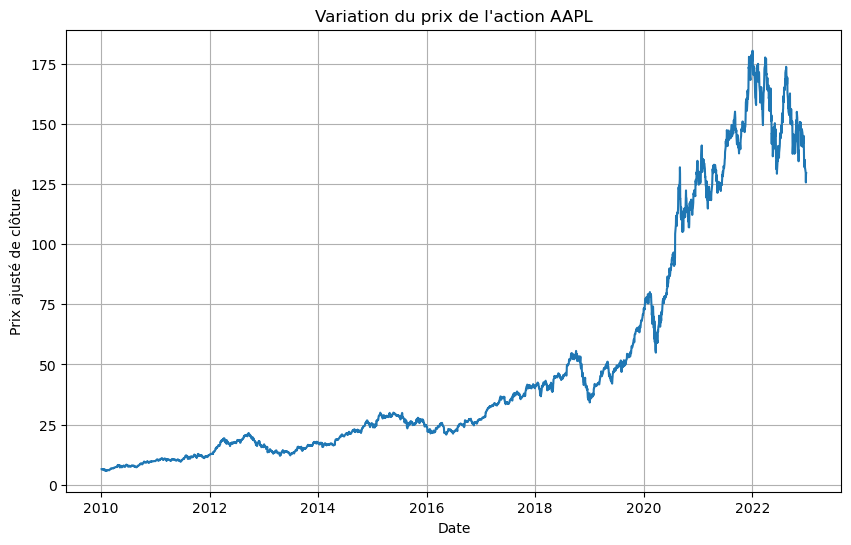

In [20]:
# Visualisation des donnees :
plt.figure(figsize=(10, 6))
plt.plot(data.index, data.values)
plt.title("Variation du prix de l'action AAPL")
plt.xlabel("Date")
plt.ylabel("Prix ajusté de clôture")
plt.grid(True)
plt.show()

## Décomposition de séries temporelles :

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose as sm

In [22]:


from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(data):
    """
    A function that returns the trend, seasonality and residual captured by applying both multiplicative and
    additive model.
    df -> DataFrame
    column_name -> column_name for which trend, seasonality is to be captured
    """
    result_mul = seasonal_decompose( model='multiplicative', extrapolate_trend = 'freq')
    result_add = seasonal_decompose( model = 'additive', extrapolate_trend='freq')

    plt.rcParams.update({'figure.figsize': (20, 10)})
    result_mul.plot().suptitle('Multiplicative Decompose', fontsize=30)
    result_add.plot().suptitle('Additive Decompose', fontsize=30)
    plt.show()

    return result_mul, result_add
     

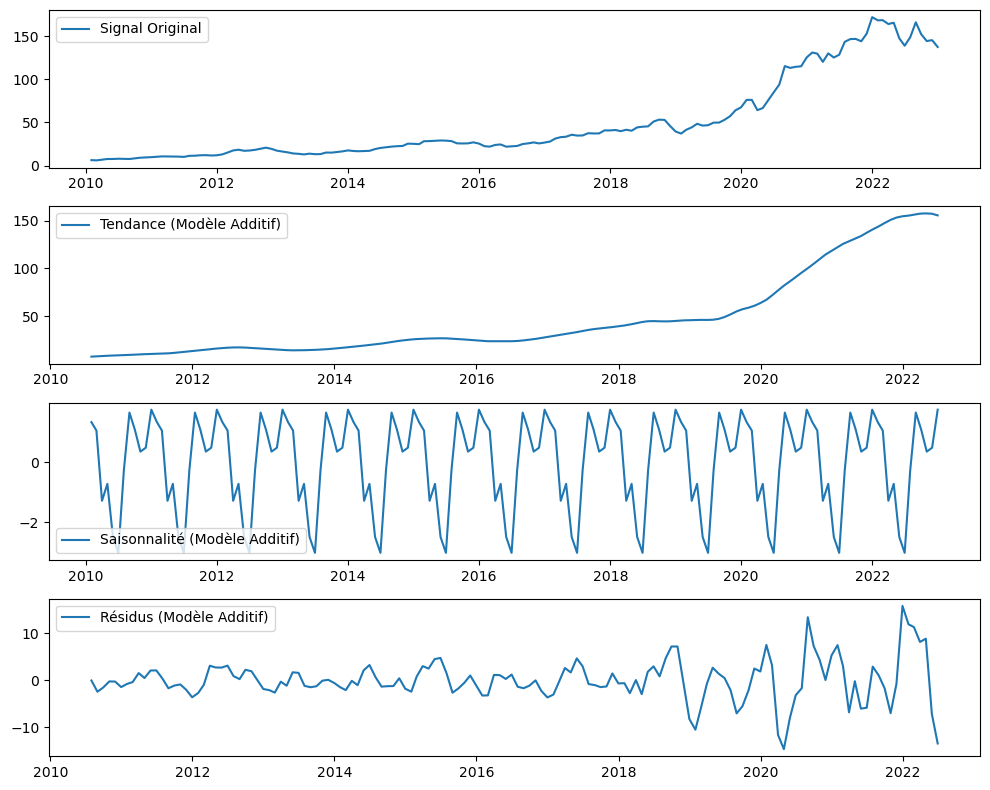

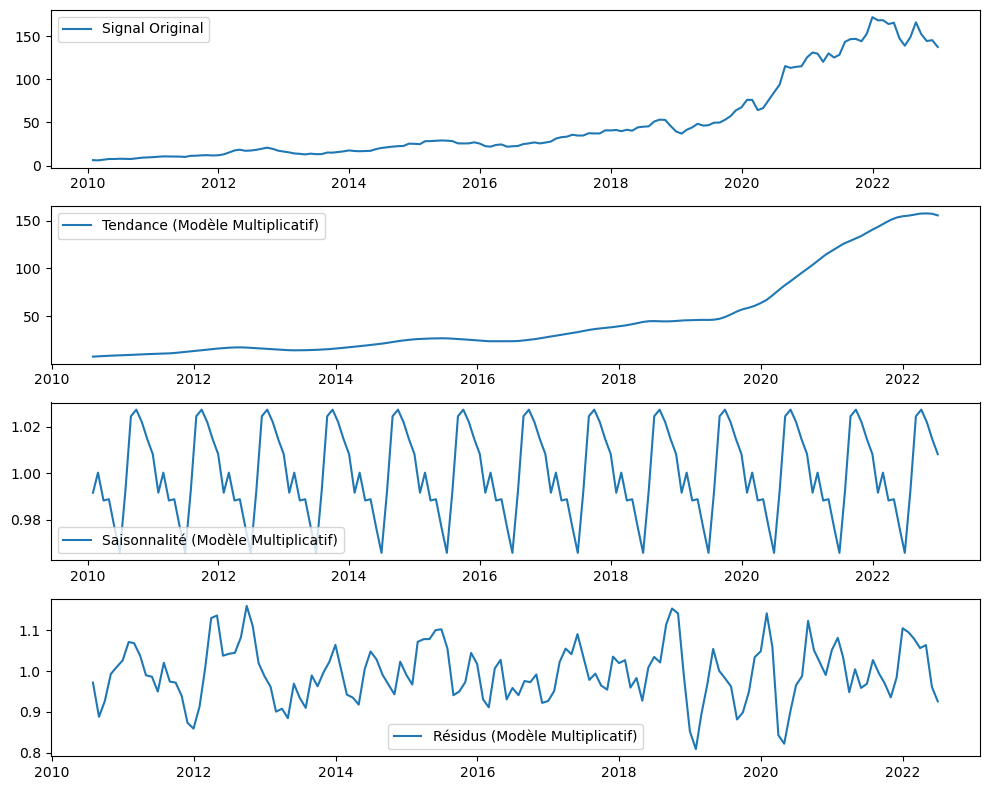

In [36]:

# Convertir l'index en objets de type 'datetime'
data.index = pd.to_datetime(data.index)

# Rééchantillonner les données à une fréquence mensuelle
data_resampled = data.resample('M').mean()

# Décomposition avec le modèle additif
decomposition_additive = seasonal_decompose(data_resampled, model='additive')
trend_additive = decomposition_additive.trend
seasonality_additive = decomposition_additive.seasonal
residuals_additive = decomposition_additive.resid

# Décomposition avec le modèle multiplicatif
decomposition_multiplicative = seasonal_decompose(data_resampled, model='multiplicative')
trend_multiplicative = decomposition_multiplicative.trend
seasonality_multiplicative = decomposition_multiplicative.seasonal
residuals_multiplicative = decomposition_multiplicative.resid

# Afficher les composantes pour le modèle additif
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(data_resampled, label='Signal Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_additive, label='Tendance (Modèle Additif)')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonality_additive, label='Saisonnalité (Modèle Additif)')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residuals_additive, label='Résidus (Modèle Additif)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Afficher les composantes pour le modèle multiplicatif
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(data_resampled, label='Signal Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_multiplicative, label='Tendance (Modèle Multiplicatif)')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonality_multiplicative, label='Saisonnalité (Modèle Multiplicatif)')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residuals_multiplicative, label='Résidus (Modèle Multiplicatif)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Construire et évaluer des prévisions de séries chronologiques :

In [24]:
# Convertir l'index en objets de type 'datetime'
data.index = pd.to_datetime(data.index)

# Effectuer le test de Dickey-Fuller
result = adfuller(data)

# Extraire les résultats du test
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Afficher les résultats
print(f"Statistique ADF : {adf_statistic}")
print(f"p-valeur : {p_value}")
print("Valeurs critiques :")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Interprétation des résultats
print("\nInterprétation des résultats :")
if p_value < 0.05:
    print("La p-valeur est inférieure à 0.05. La série temporelle est stationnaire.")
else:
    print("La p-valeur est supérieure à 0.05. La série temporelle n'est pas stationnaire.")


Statistique ADF : -0.2177971535466874
p-valeur : 0.9363667278248566
Valeurs critiques :
   1%: -3.4323643041051666
   5%: -2.862429999065346
   10%: -2.5672437656428793

Interprétation des résultats :
La p-valeur est supérieure à 0.05. La série temporelle n'est pas stationnaire.


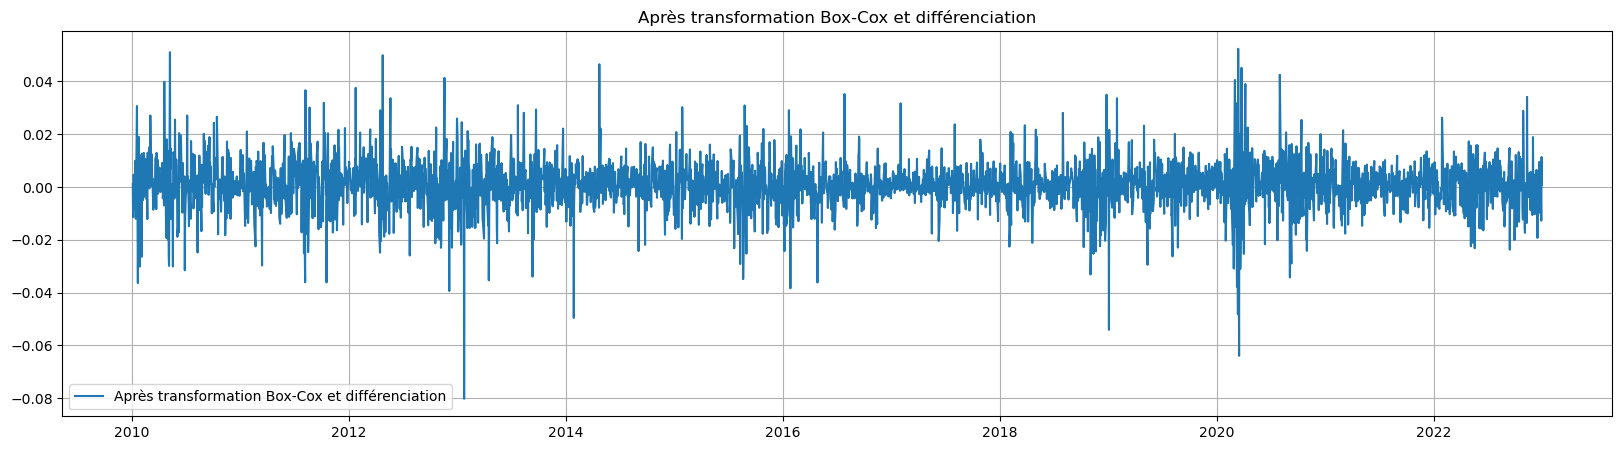

In [25]:
# Convertir l'index en objets de type 'datetime'
data.index = pd.to_datetime(data.index)

# Appliquer la transformation Box-Cox
data_boxcox, lam = boxcox(data)

# Convertir data_boxcox en un objet pd.Series
data_boxcox = pd.Series(data_boxcox, index=data.index)

# Calculer la différence entre les observations
data_boxcox_diff = data_boxcox - data_boxcox.shift()

# Afficher le graphique
plt.figure(figsize=(20, 5))
plt.grid()
plt.plot(data_boxcox_diff, label='Après transformation Box-Cox et différenciation')
plt.legend(loc='best')
plt.title('Après transformation Box-Cox et différenciation')
plt.show()

In [26]:
data_boxcox_diff.tail()

Date
2022-12-23   -0.001136
2022-12-27   -0.005676
2022-12-28   -0.012711
2022-12-29    0.011395
2022-12-30    0.001003
dtype: float64

In [27]:
# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(data_boxcox_diff.dropna())

# Extraire les résultats du test de Dickey-Fuller augmenté
adf_statistic = result[0]  # La statistique ADF
p_value = result[1]  # La p-value
critical_values = result[4]  # Les valeurs critiques

# Afficher les résultats du test de Dickey-Fuller augmenté
print("Résultats du test de Dickey-Fuller augmenté :")
print("-----------------------------------------------")
print("Statistique ADF :", adf_statistic)
print("p-value :", p_value)
print("-----------------------------------------------")

# Interprétation des résultats du test de Dickey-Fuller augmenté
print("Interprétation des résultats :")
print("-----------------------------------------------")
print("La statistique ADF compare la série temporelle différenciée à des valeurs critiques.")
print("Si la statistique ADF est inférieure aux valeurs critiques, on peut rejeter l'hypothèse nulle (non-stationnarité).")
print("Plus la statistique ADF est négative et plus elle s'éloigne des valeurs critiques, plus la stationnarité est probable.")
print("La p-value mesure la probabilité d'obtenir une statistique ADF aussi extrême que celle observée, sous l'hypothèse nulle.")
print("Si la p-value est inférieure à un seuil (par exemple, 0.05), on peut rejeter l'hypothèse nulle et conclure à la stationnarité.")
print("-----------------------------------------------")
print("Valeurs critiques :")
for key, value in critical_values.items():
    print(key, ":", value)
print("-----------------------------------------------")

# Commentaire sur le résultat du test de Dickey-Fuller augmenté
print("Commentaire sur le résultat :")
print("-----------------------------------------------")
if adf_statistic < critical_values['1%'] and p_value < 0.05:
    print("La statistique ADF est inférieure à la valeur critique de 1% et la p-value est inférieure à 0.05.")
    print("On peut donc rejeter l'hypothèse nulle de non-stationnarité.")
    print("La série temporelle différenciée est considérée comme stationnaire.")
else:
    print("La statistique ADF est supérieure à la valeur critique de 1% ou la p-value est supérieure à 0.05.")
    print("On ne peut pas rejeter l'hypothèse nulle de non-stationnarité.")
    print("La série temporelle différenciée n'est pas considérée comme stationnaire.")
print("-----------------------------------------------")


Résultats du test de Dickey-Fuller augmenté :
-----------------------------------------------
Statistique ADF : -11.877860722531652
p-value : 6.2787118809453965e-22
-----------------------------------------------
Interprétation des résultats :
-----------------------------------------------
La statistique ADF compare la série temporelle différenciée à des valeurs critiques.
Si la statistique ADF est inférieure aux valeurs critiques, on peut rejeter l'hypothèse nulle (non-stationnarité).
Plus la statistique ADF est négative et plus elle s'éloigne des valeurs critiques, plus la stationnarité est probable.
La p-value mesure la probabilité d'obtenir une statistique ADF aussi extrême que celle observée, sous l'hypothèse nulle.
Si la p-value est inférieure à un seuil (par exemple, 0.05), on peut rejeter l'hypothèse nulle et conclure à la stationnarité.
-----------------------------------------------
Valeurs critiques :
1% : -3.4323643041051666
5% : -2.862429999065346
10% : -2.567243765642879

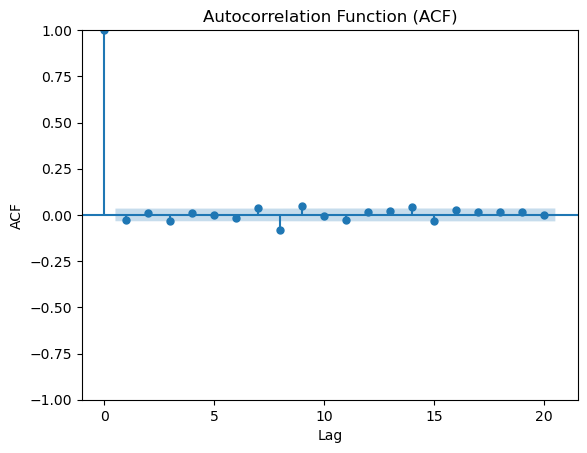

In [28]:
# Calculer la fonction d'autocorrélation (ACF)
acf = plot_acf(data_boxcox_diff.dropna(), lags=20)

# Afficher la fonction d'autocorrélation (ACF)
plt.xlabel('Lag')  # Définit le label de l'axe x
plt.ylabel('ACF')  # Définit le label de l'axe y
plt.title('Autocorrelation Function (ACF)')  # Définit le titre du graphique
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


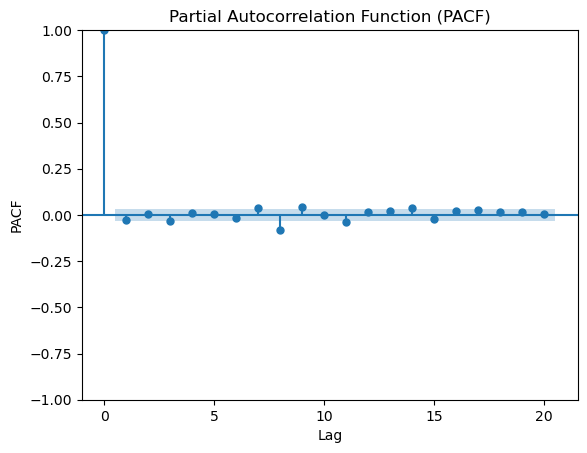

In [29]:


from statsmodels.graphics.tsaplots import plot_pacf

# Calculate the partial autocorrelation function (PACF)
pacf = plot_pacf(data_boxcox_diff.dropna(), lags=20)

# Plot the partial autocorrelation function (PACF)
plt.xlabel('Lag')  # Set the label for the x-axis
plt.ylabel('PACF')  # Set the label for the y-axis
plt.title('Partial Autocorrelation Function (PACF)')  # Set the title of the plot
plt.show()

     


In [30]:
# Définir la taille de l'ensemble de test (par exemple, 20% des données)
test_size = 0.2

# Calculer l'indice de séparation pour diviser les données en train et test
split_index = int(len(data_boxcox_diff) * (1 - test_size))

# Diviser les données en train et test
train_data = data_boxcox_diff[:split_index]
test_data = data_boxcox_diff[split_index:]

# Afficher les premières lignes de l'ensemble d'entraînement
print("Ensemble d'entraînement:")
print(train_data.head())

# Afficher les premières lignes de l'ensemble de test
print("Ensemble de test:")
print(test_data.head())


Ensemble d'entraînement:
Date
2010-01-04         NaN
2010-01-05    0.001222
2010-01-06   -0.011357
2010-01-07   -0.001313
2010-01-08    0.004699
dtype: float64
Ensemble de test:
Date
2020-05-28    0.000197
2020-05-29   -0.000435
2020-06-01    0.005454
2020-06-02    0.002058
2020-06-03    0.002443
dtype: float64


In [31]:
# Créer un modèle ARIMA avec un ordre (p, d, q) spécifié
model = ARIMA(train_data, order=(1, 1,0 ))

# Ajuster le modèle aux données d'entraînement
model_fit = model.fit()

# Afficher les paramètres du modèle
print(model_fit.params)

ar.L1    -0.519624
sigma2    0.000143
dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


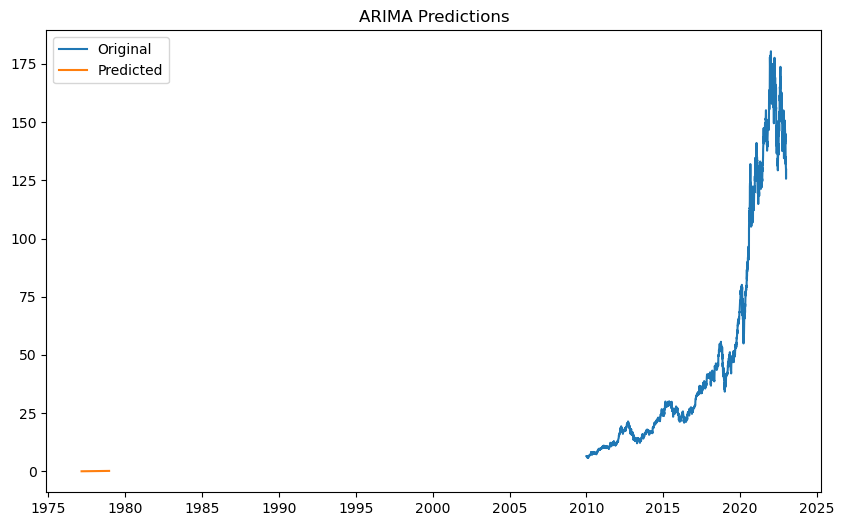

In [32]:
# Faire des prédictions sur les données de test
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Ajouter les prédictions aux différences pour obtenir les valeurs corrigées
predictions_corrected = predictions.cumsum()

# Ajouter les valeurs initiales pour obtenir la série temporelle originale
data_predicted = predictions_corrected.add(train_data.iloc[-1])

# Afficher la série temporelle prédite
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original')
plt.plot(data_predicted, label='Predicted')
plt.legend(loc='best')
plt.title('ARIMA Predictions')
plt.show()


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


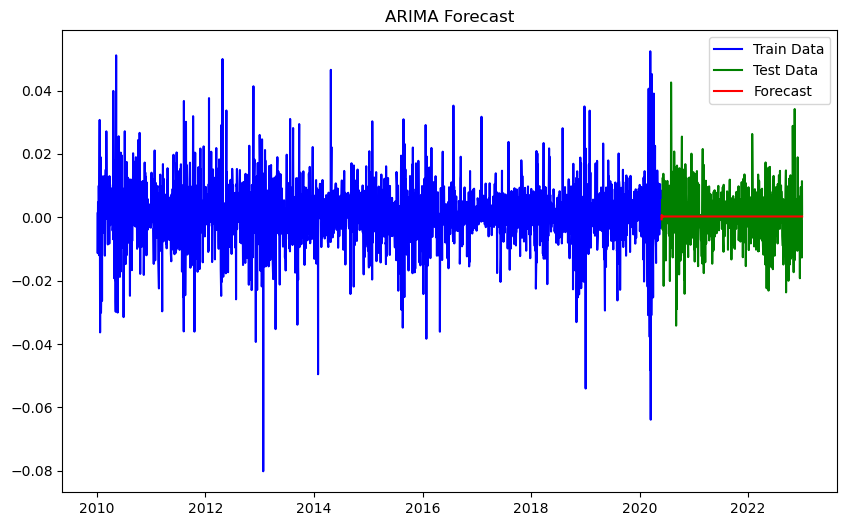

In [33]:
# Ajuster le modèle aux données d'entraînement
model_fit = model.fit()

# Générer les prévisions
forecast = model_fit.forecast(steps=len(test_data))

# Plot des données d'entraînement, de test et des prévisions
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Train Data', color='blue')
plt.plot(test_data.index, test_data, label='Test Data', color='green')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.legend(loc='best')
plt.title('ARIMA Forecast')
plt.show()


In [35]:
# Calculer les prédictions du modèle
predictions = model_fit.forecast(steps=len(test_data))

# Calculer l'erreur quadratique moyenne
mse = mean_squared_error(test_data, predictions)

# Calculer la racine carrée de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

# Interprétation des résultats
print("Le RMSE est mesure l'erreur moyenne entre les valeurs réelles et les prédictions du modèle. Plus le RMSE est proche de 0, plus les prédictions sont précises.")

RMSE: 0.008355402287150412
Le RMSE est mesure l'erreur moyenne entre les valeurs réelles et les prédictions du modèle. Plus le RMSE est proche de 0, plus les prédictions sont précises.


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
